# 프로젝트 설명<br>
- 이번 프로젝트의 목표는 잠재 고객을 찾아내는 것입니다.
- 은행은 대출 고객을 통해 이자 수익을 얻기를 원합니다.
- 은행이 지난해 고객을 대상으로 진행한 캠페인은 9% 이상의 성공률을 보였습니다.

- 대출을 구매할 가능성이 더 높은 잠재 고객을 식별하는 데 도움이 되는 모델을 구축한다면 캠페인 성공률을 더욱 높일 수 있을 것입니다.

# 데이터 설명<br>
은행의 고객 데이터 입니다.

Personal Loan 변수가 우리가 예측하고 싶은 타겟 변수 입니다.  
고객들의 다른 데이터를 바탕으로 해당 고객이 대출 권유에 응할지 응하지 않을지 예측합니다.

---
데이터 변수 설명

* ID : 1번부터 5000번 까지 변환 처리된 고객 ID 
* Age : 고객의 나이
* Experience : 가입기간(년)
* Income : 연소득 (달러)
* Zip Code : 우편번호
* Family : 고객의 가족 규모
* CCAvg : 평균 신용카드 지출
* Education : 고객의 교육 수준
* Mortage : 주택담보대출의 가치
* Personal Loan : 지난 캠페인에서 대출 권유를 받아들였는지 여부 (타겟 변수)
* Securities Account : 은행에 증권 계좌를 가지고 있는지 여부
* CD Account : 은행에 예금 증명서(CD) 계좌를 가지고 있는지 여부
* Online : 인터넷 뱅킹을 사용하는지 여부
* Credit Card : 고객이 은행에서 발급한 신용카드를 사용하는지 여부

### 데이터 불러오기

In [ ]:
## 상품 수령울 위한 이름과 연락처를 주석으로 입력해주세요.
## 이름 : 김동욱
## 연락처 : jayk01213@ajou.ac.kr

In [311]:
## 필요한 패키지들을 불러오세요.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [312]:
## 주어진 파일명을 활용하여 데이터를 불러와 할당해 보세요. (Bank_Personal_Loan_Modelling.xlsx)
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')
data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]




In [313]:
## 데이터의 정보를 확인해보세요.
data



,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


### 전처리

In [314]:
## 데이터의 결측치를 확인해 보세요.
data.isnull().sum() # no null data




ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [315]:
## 데이터의 기본 통계치들을 요약하여 확인해 보세요.

data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [317]:
# 각각의 변수에 유니크한 값이 얼마나 있는지 확인해 보세요.
columns = data.columns.values.tolist() # counts how many of each value

for c in columns:
  print(c + "--------------------")
  print(data[c].value_counts())
  print("--------------------------------")

ID--------------------
1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: ID, Length: 5000, dtype: int64
--------------------------------
Age--------------------
35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: Age, dtype: int64
--------------------------------
Experience--------------------
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7  

In [318]:
## 데이터 통계치의 요약 정보를 보니 'Experience' 변수에 음수가 있습니다. 몇 개나 있는지 확인해보세요.
data['Experience'].value_counts() # there are 33 '-1', 15 '-2', 4 '-3'



 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [319]:
## Experience 변수가 음수인 경우, 해당 object의 Age 변수와 Education 변수를 기준으로 동일한 데이터들의 Experiecne 변수 중앙값을 찾아 치환해 보세요.

tmp = data[data['Experience'] >= 0].groupby(['Age', 'Education']).median()['Experience']

for i in range(len(data)):
  if data.loc[i, 'Experience'] < 0:
    try:
      data.loc[i, 'Experience'] = tmp[data.loc[i, 'Age']][data.loc[i, 'Education']]
    except:
      pass
# data.loc to find location of "data"'s 'Expereience' value / 'groupby' and 'median' to calculate median of 'Experience' by 'Age' and 'Education'

In [320]:
## Experience 변수가 0보다 작은것이 있는지 다시 확인해 보세요.
data['Experience'].value_counts()

# There is still negative value because there might be some negative 'Experience' with unique 'Age' and 'Education'



 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 3     133
 24    131
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 8     119
 6     119
 15    119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 0      97
 38     88
 2      85
 39     85
 1      79
 40     57
 41     43
 42      8
-1       6
-2       4
 43      3
-3       2
Name: Experience, dtype: int64

### 시각화  
여러가지 시각화를 통해 데이터를 탐색해 보세요.

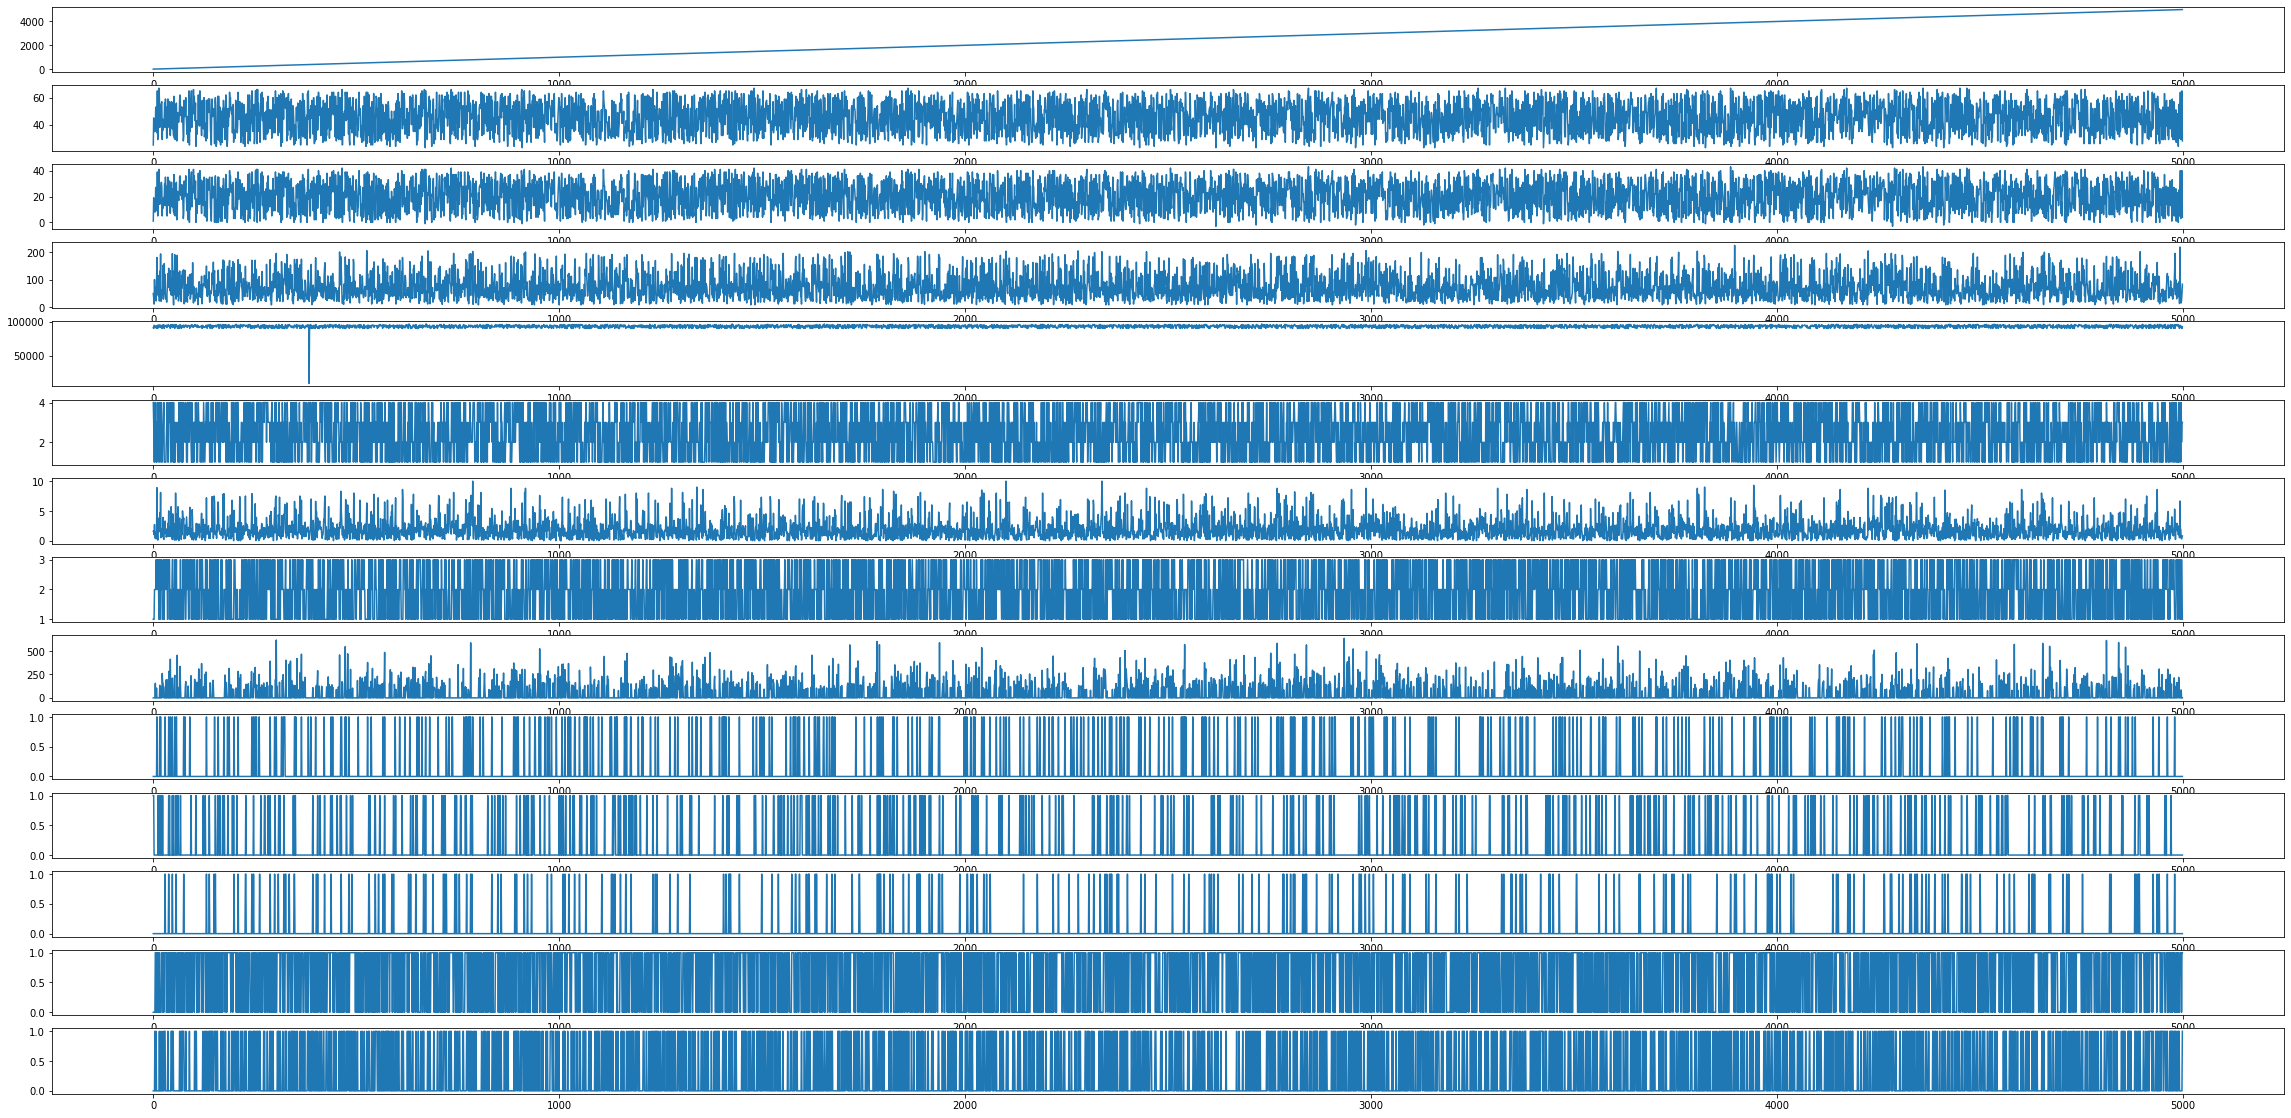

In [321]:
# normal plotting
fig, axes = plt.subplots(nrows=14, ncols=1)

for i, c in enumerate(columns):
  data[c].plot(ax=axes[i], figsize = (40, 20))

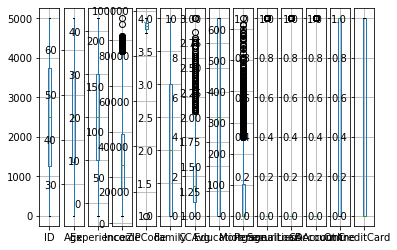

In [322]:
#box plot
fig, axes = plt.subplots(nrows=1, ncols=14)

for i, c in enumerate(columns):
  data[[c]].boxplot(ax=axes[i])

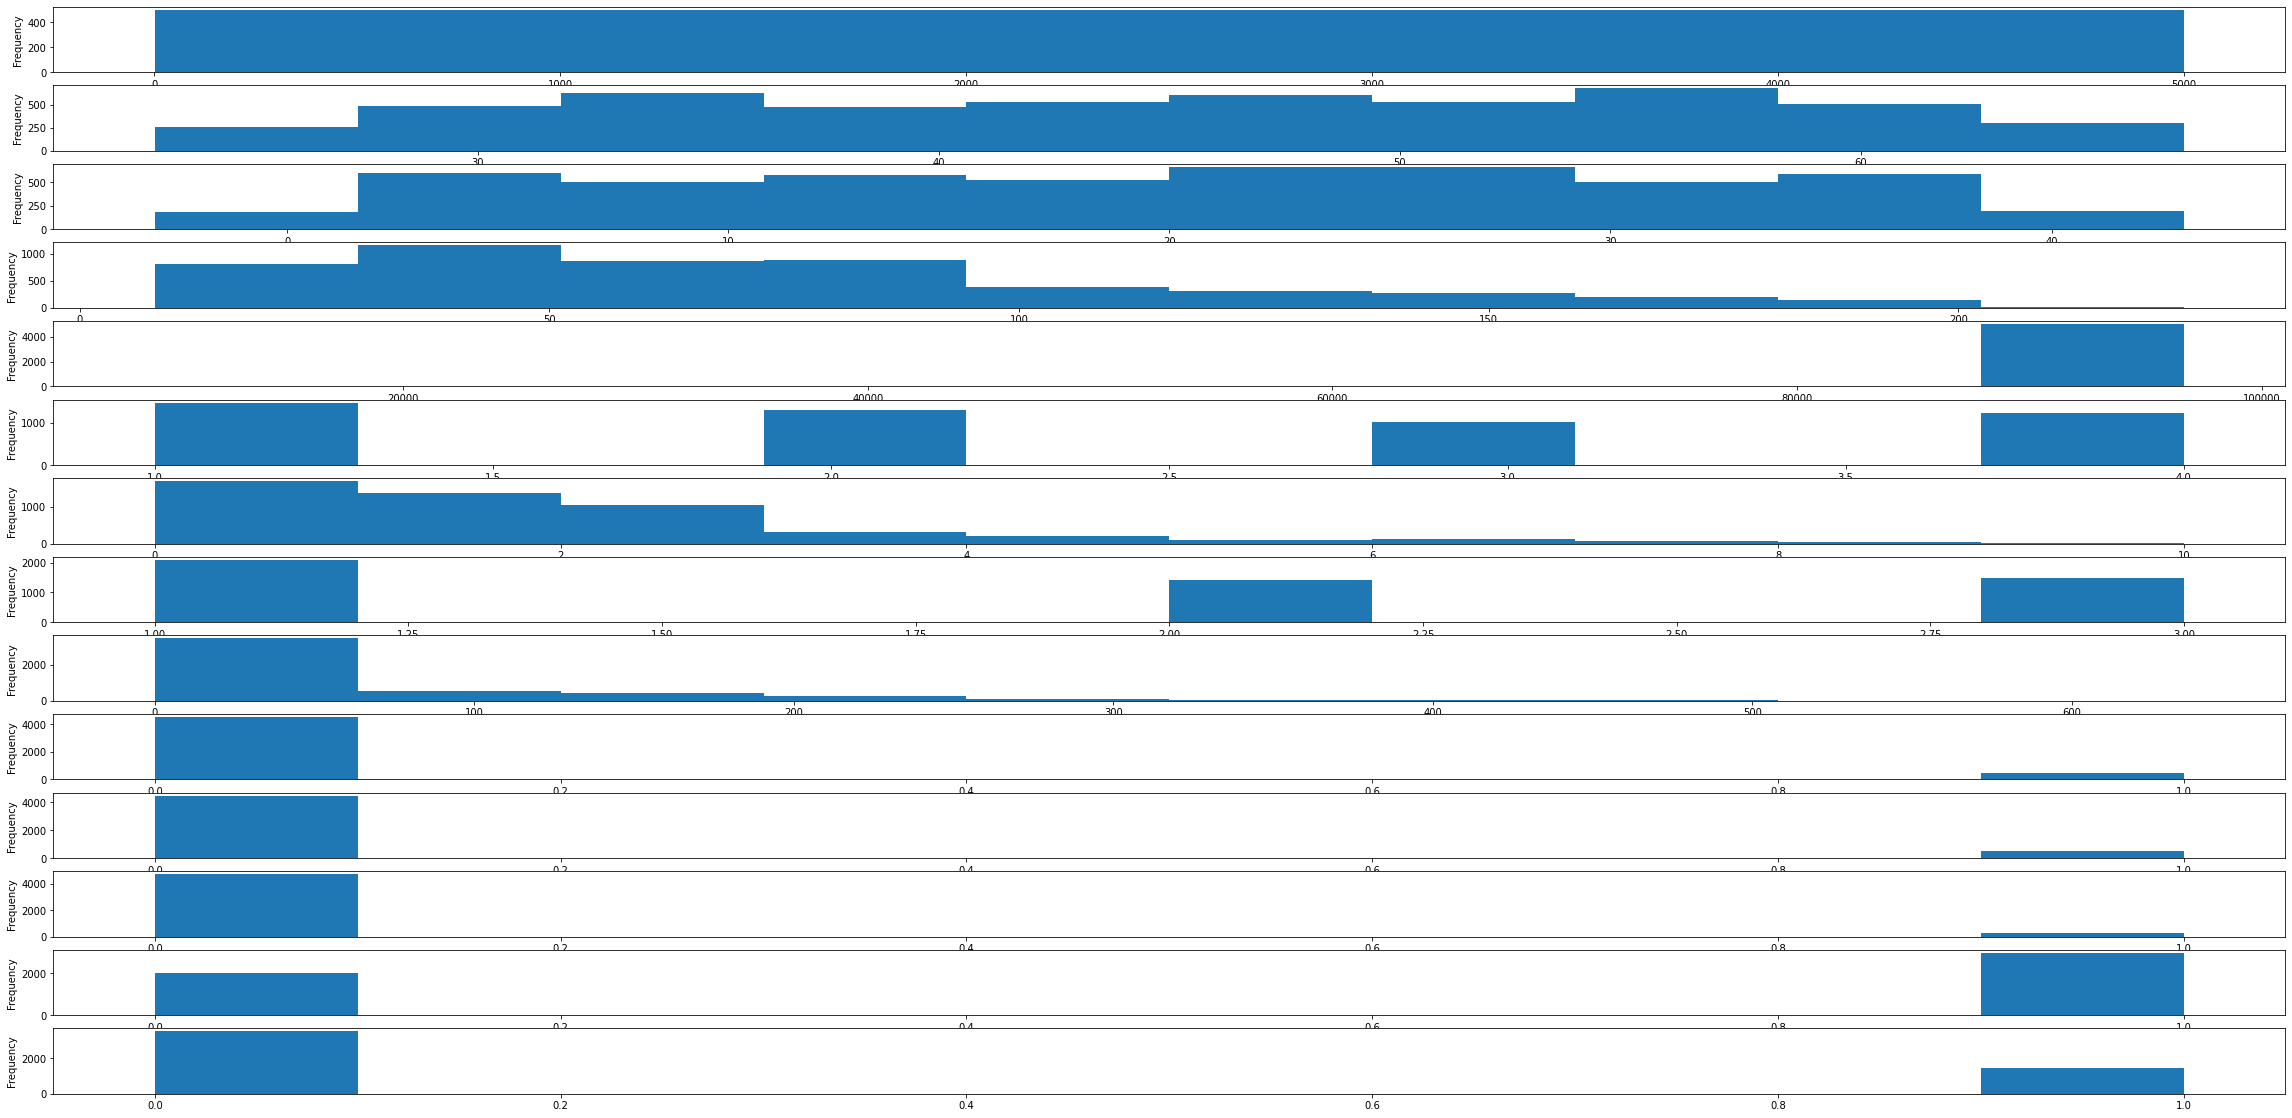

In [323]:
# histogram plotting
fig, axes = plt.subplots(nrows=14, ncols=1)

for i, c in enumerate(columns):
  data[c].plot(kind = "hist", ax=axes[i], figsize = (40, 20))

<AxesSubplot:xlabel='Income', ylabel='PersonalLoan'>

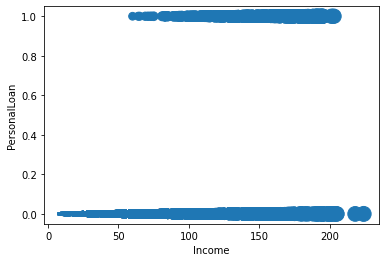

In [324]:
# scatter flot with each xs and y
data.plot(kind = "scatter", x = "Income", y = "PersonalLoan", s=(data['Income']))

<AxesSubplot:xlabel='CCAvg', ylabel='PersonalLoan'>

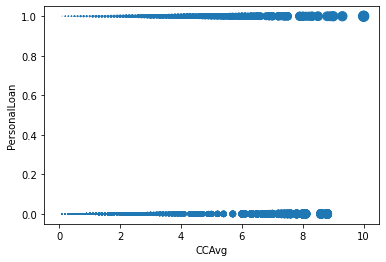

In [325]:
# scatter flot with x and y
data.plot(kind = "scatter", x = "CCAvg", y = "PersonalLoan", s=(data['CCAvg']**2))

<AxesSubplot:xlabel='Education', ylabel='PersonalLoan'>

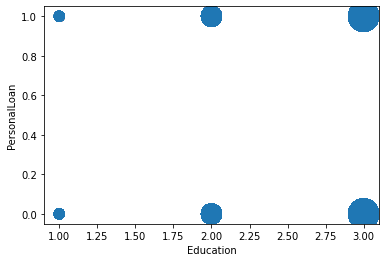

In [326]:
# scatter flot with x and y
data.plot(kind = "scatter", x = "Education", y = "PersonalLoan", s=(100*data['Education']**2))

<AxesSubplot:xlabel='Mortgage', ylabel='PersonalLoan'>

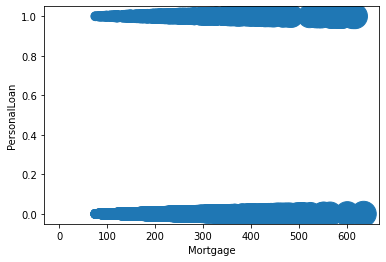

In [327]:
# scatter flot with x and y
data.plot(kind = "scatter", x = "Mortgage", y = "PersonalLoan", s=(data['Mortgage']))

<AxesSubplot:xlabel='SecuritiesAccount', ylabel='PersonalLoan'>

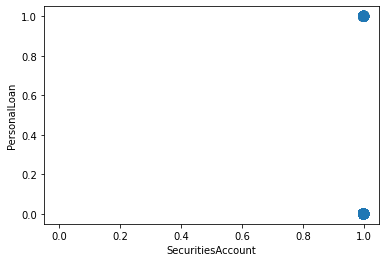

In [328]:
# scatter flot with x and y
data.plot(kind = "scatter", x = "SecuritiesAccount", y = "PersonalLoan", s=(100*data['SecuritiesAccount']**2))

<AxesSubplot:xlabel='CDAccount', ylabel='PersonalLoan'>

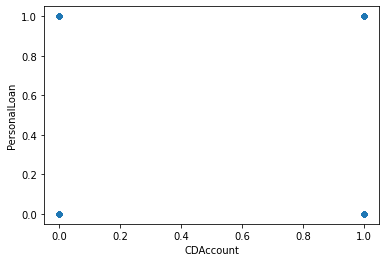

In [329]:
# scatter flot with x and y
data.plot(kind = "scatter", x = "CDAccount", y = "PersonalLoan")

<AxesSubplot:xlabel='CreditCard', ylabel='PersonalLoan'>

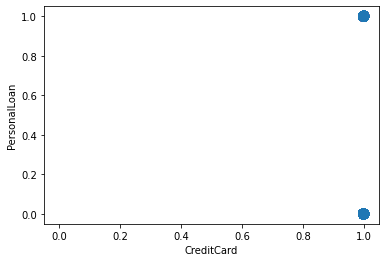

In [330]:
# scatter flot with x and y
data.plot(kind = "scatter", x = "CreditCard", y = "PersonalLoan", s=(100*data['CreditCard']**2))

### 모델 적용
데이터를 트레인, 테스트 셋으로 나누고 여러가지 모델을 통해 예측과 평가를 실행해 보세요.

In [331]:
#data split
X = data[['Income', 'CCAvg', 'CreditCard']]
y = data[['PersonalLoan']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)

print(len(X_train))

3750


### Decision tree classifier

In [332]:
model1 = DecisionTreeClassifier(random_state=99, max_depth=5) # model 1 uses Decision Tree
model1.fit(X_train, y_train)

pred = model1.predict(X_test)

In [333]:
correct = 0

for i, y in enumerate(y_test['PersonalLoan']):
  if y == pred[i]:
    correct += 1
    

In [334]:
print("Accuracy: ", correct/1250)

Accuracy:  0.896


### Naive Bayes

In [335]:
model2 = GaussianNB() # model 2 uses NB
model2.fit(X_train, np.ravel(y_train))

pred = model2.predict(X_test)

In [336]:
correct = 0

for i, y in enumerate(y_test['PersonalLoan']):
  if y == pred[i]:
    correct += 1
    
print("Accuracy: ", correct/1250)

Accuracy:  0.8776


### Random Forest classifier

In [337]:
model3 = RandomForestClassifier(n_estimators=2, random_state=0) # 3uses RF
model3.fit(X_train, np.ravel(y_train))

pred = model3.predict(X_test)

In [338]:
correct = 0

for i, y in enumerate(y_test['PersonalLoan']):
  if y == pred[i]:
    correct += 1
    
print("Accuracy: ", correct/1250)

Accuracy:  0.9016


### KNN ( K - Nearest Neighbour )

In [340]:
model4 = KNeighborsClassifier(n_neighbors = 3) # 4 uses KNN
model4.fit(X_train, np.ravel(y_train))

pred = model4.predict(X_test)

In [341]:
correct = 0

for i, y in enumerate(y_test['PersonalLoan']):
  if y == pred[i]:
    correct += 1
    
print("Accuracy: ", correct/1250)

Accuracy:  0.8944


### Model comparison  
여러가지 모델을 비교하여 최적의 모델을 찾아보세요.

In [ ]:
# Decision Tree : 0.896 / NB : 0.8776 / RF : 0.9016 / KNN : 0.8944
So, RF was the best model